# Zakhar Malov

## Research question/interests

What is the relation between Cost of Revenue and Total Revenue among companies?

Firstly, I made some preliminary work, reflected in [preliminary notebook](analysis3-preliminary.ipynb). During this work, I evaluated the current dataset, choosed the values to study, and created the function to read and preprocess the data.

In [1]:
import project_functions3 as p3
df=p3.load_and_process('../data/raw/fundamentals.csv')
df

,Ticker Symbol,Cost of Revenue,Earnings Before Interest and Tax,Earnings Before Tax,Gross Profit,Income Tax,"Sales, General and Admin.",Total Current Liabilities,Total Revenue,For Year
0,AAL,1.049900e+10,-1.813000e+09,-2.445000e+09,1.435600e+10,-569000000.0,1.297700e+10,9.011000e+09,2.485500e+10,2012.0
20,ABT,8.899000e+09,1.000000e+08,-2.200000e+08,1.015100e+10,-457000000.0,6.735000e+09,1.328000e+10,1.905000e+10,2012.0
36,ADS,2.392091e+09,9.743640e+08,6.829040e+08,1.249299e+09,260648000.0,1.080590e+08,5.032777e+09,3.641390e+09,2012.0
44,AEE,3.477000e+09,1.221000e+09,8.290000e+08,2.304000e+09,307000000.0,4.430000e+08,2.686000e+09,5.781000e+09,2012.0
48,AEP,6.395000e+09,2.810000e+09,1.822000e+09,8.550000e+09,604000000.0,3.812000e+09,6.823000e+09,1.494500e+10,2012.0
...,...,...,...,...,...,...,...,...,...,...
1760,XYL,2.249000e+09,4.580000e+08,4.030000e+08,1.404000e+09,63000000.0,8.540000e+08,8.230000e+08,3.653000e+09,2015.0
1764,YHOO,2.077748e+09,-4.813176e+09,-4.813176e+09,2.890553e+09,-89598000.0,1.768522e+09,1.277380e+09,4.968301e+09,2015.0
1772,ZBH,1.800600e+09,4.398000e+08,1.532000e+08,4.197200e+09,7000000.0,2.291900e+09,1.617900e+09,5.997800e+09,2015.0
1776,ZION,4.934400e+07,5.207260e+08,4.518590e+08,0.000000e+00,142388000.0,1.591239e+09,0.000000e+00,2.210591e+09,2015.0


I saw, that the dateestamp is distributed not uniformly. Thus, already during the raw preprocess I kept only the instances that occured on the 31st decembers of the considered years. For more deep study, we may need the separate data for different years. The function above is created to make the following:

* We add the additional columns, named 'Ratio' and 'Difference' to check the basic hypotesis about some proportionalities between cost of revenue and the total revenue

* We provide as output the dataframes for different years as well as the total dataframe

In [2]:
def preprocessYearByYearData(df):
    #For now we are looking only for studied variable, 'Total Revenue'
    relevant_features_in_list=df.columns.tolist()
    tonotstury=relevant_features_in_list.copy()
    tonotstury.remove('Cost of Revenue')
    tonotstury.remove('For Year')
    tonotstury.remove('Total Revenue')
    df2 = df.copy().drop(tonotstury, axis=1)
    
    #we'll take away outliers
    costs = np.array(df2['Cost of Revenue'])
    costs_low, costs_hgh = np.percentile(costs, [5, 95])
    print(costs_low, costs_hgh)
    df_cleaned = df2[df2['Cost of Revenue'].between(costs_low, costs_hgh)]
    revenus = np.array(df2['Total Revenue'])
    revenus_low, revenus_hgh = np.percentile(revenus, [5, 95])
    print(revenus_low, revenus_hgh)
    df_cleaned = df_cleaned[df_cleaned['Total Revenue'].between(revenus_low, revenus_hgh)]
    
    df_cleaned['Ratio'] = df_cleaned['Cost of Revenue'] / df_cleaned['Total Revenue']
    df_cleaned['Difference'] =  df_cleaned['Total Revenue']-df_cleaned['Cost of Revenue']
    #we'll take away outliers for these values as well
    ratios = np.array(df_cleaned['Ratio'])
    ratios_low, ratios_hgh = np.percentile(ratios, [5, 95])   
    df_cleaned = df_cleaned[df_cleaned['Ratio'].between(ratios_low, ratios_hgh)]
    differences = np.array(df_cleaned['Difference'])
    differences_low, differences_hgh = np.percentile(differences, [5, 95])   
    df_cleaned = df_cleaned[df_cleaned['Difference'].between(differences_low, differences_hgh)]
    
    
    df2_2012 = df_cleaned.copy()[df_cleaned['For Year']==2012]
    df2_2013 = df_cleaned.copy()[df_cleaned['For Year']==2013]
    df2_2014 = df_cleaned.copy()[df_cleaned['For Year']==2014]
    df2_2015 = df_cleaned.copy()[df_cleaned['For Year']==2015]        
    return df2_2012,df2_2013,df2_2014,df2_2015,df_cleaned

We check the basic properties of the obtained dataframes.

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from datetime import datetime

df_2012,df_2013,df_2014,df_2015,df2=preprocessYearByYearData(df)
print(df_2012.describe())
print(df_2013.describe())
print(df_2014.describe())
print(df_2015.describe())
print(df2.describe())

0.0 46324950000.00001
1375658050.0 87154450000.00006
       Cost of Revenue  Total Revenue  For Year       Ratio    Difference
count     1.490000e+02   1.490000e+02     149.0  149.000000  1.490000e+02
mean      4.442917e+09   9.115683e+09    2012.0    0.445202  4.672767e+09
std       4.648856e+09   7.298739e+09       0.0    0.231852  3.924654e+09
min       0.000000e+00   1.527042e+09    2012.0    0.000000  1.041600e+09
25%       1.125200e+09   3.823713e+09    2012.0    0.264754  1.726842e+09
50%       3.011684e+09   6.376000e+09    2012.0    0.488088  3.097418e+09
75%       6.530000e+09   1.224500e+10    2012.0    0.628054  6.565000e+09
max       2.193900e+10   3.715200e+10    2012.0    0.838592  1.933200e+10
       Cost of Revenue  Total Revenue  For Year       Ratio    Difference
count     2.320000e+02   2.320000e+02     232.0  232.000000  2.320000e+02
mean      5.454721e+09   1.048602e+10    2013.0    0.445256  5.031298e+09
std       6.754835e+09   9.477303e+09       0.0    0.244492

|| Cost of Revenue | Total Revenue|  For Year    |   Ratio  |  Difference|
|---|---|---|---|---|---|
|25%    |   1.125200e+09 |  3.823713e+09  |  2012.0 |   0.264754 | 1.726842e+09|
|75%    |   6.530000e+09 |  1.224500e+10  |  2012.0  |  0.628054 | 6.565000e+09|

\
&nbsp;
|| Cost of Revenue | Total Revenue|  For Year    |   Ratio  |  Difference|
|---|---|---|---|---|---|
|25%  |     1.071224e+09 |  4.204750e+09  |  2013.0 |   0.254555|  1.911339e+09|
|75%  |     7.167400e+09 |  1.432053e+10 |   2013.0  |  0.644912 | 6.745500e+09|

\
&nbsp;

|| Cost of Revenue | Total Revenue|  For Year    |   Ratio  |  Difference|
|---|---|---|---|---|---|
|25%  |     1.117359e+09 |  4.106214e+09  |  2014.0 |   0.246103|  2.060000e+09|
|75% |      7.680750e+09  | 1.492270e+10 |   2014.0 |   0.645865 | 7.088750e+09|

\
&nbsp;

|| Cost of Revenue | Total Revenue|  For Year    |   Ratio  |  Difference|
|---|---|---|---|---|---|
|25%  |     1.043454e+09|  3.963313e+09  |  2015.0   | 0.300210 | 1.979000e+09|
|75%  |     6.648000e+09 |  1.314500e+10  |  2015.0  |  0.643699|  6.560000e+09|


\
&nbsp;
|| Cost of Revenue | Total Revenue|  For Year    |   Ratio  |  Difference|
|---|---|---|---|---|---|
|25%   |    1.081824e+09 |  4.025973e+09 | 2013.000000  |  0.266030|  1.928775e+09|
|75%   |    7.015725e+09|   1.360128e+10|  2015.000000 |   0.642073 | 6.677000e+09|


\
&nbsp;
When we look at interquartier ranges for the general data and for years separately, we clearly see that its value reject the hypothesis about proportionality between corsidered variables, as well as hypothesys about the difference close to const.

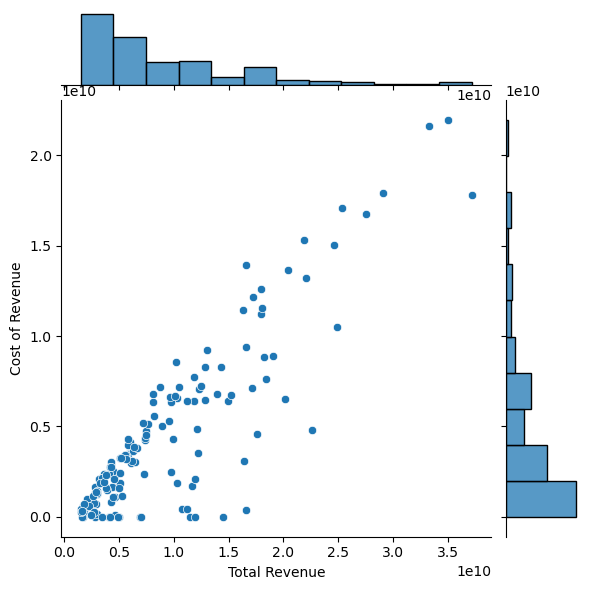

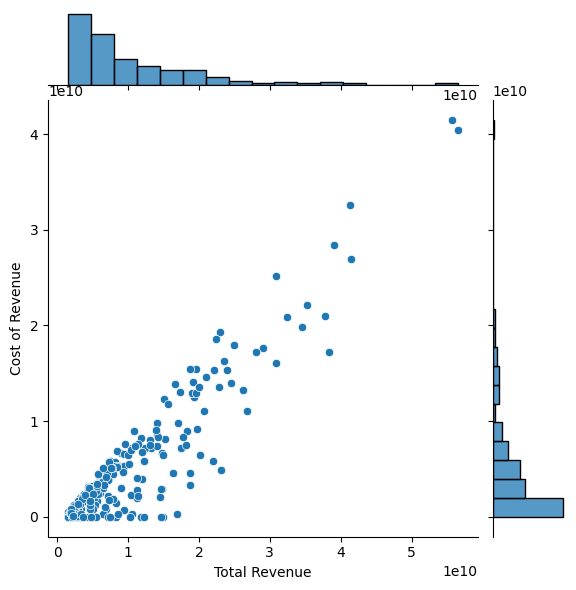

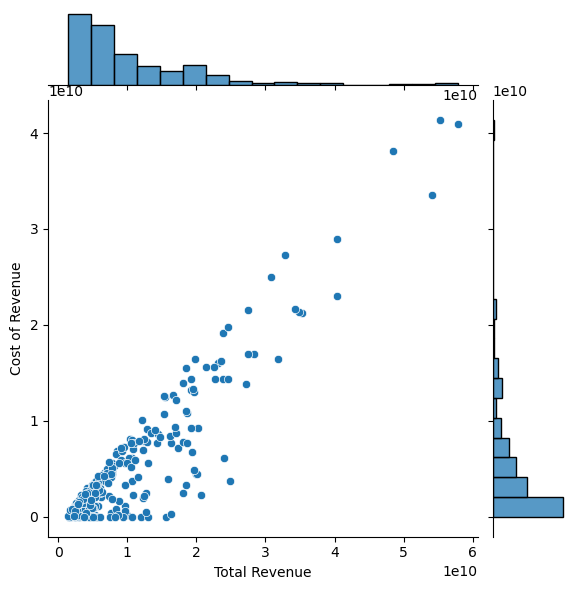

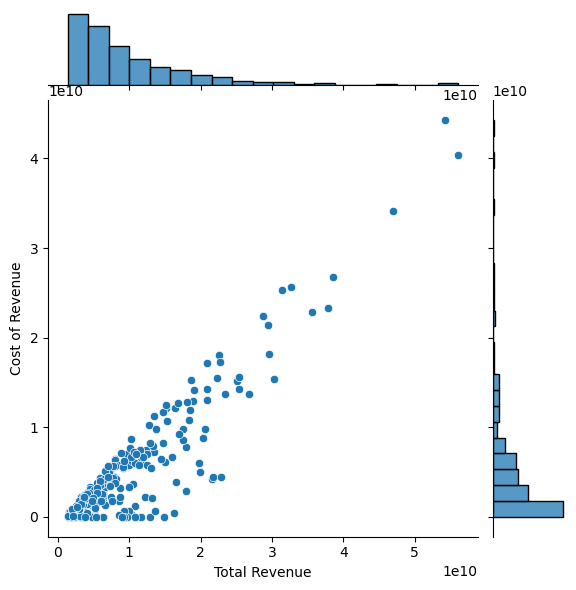

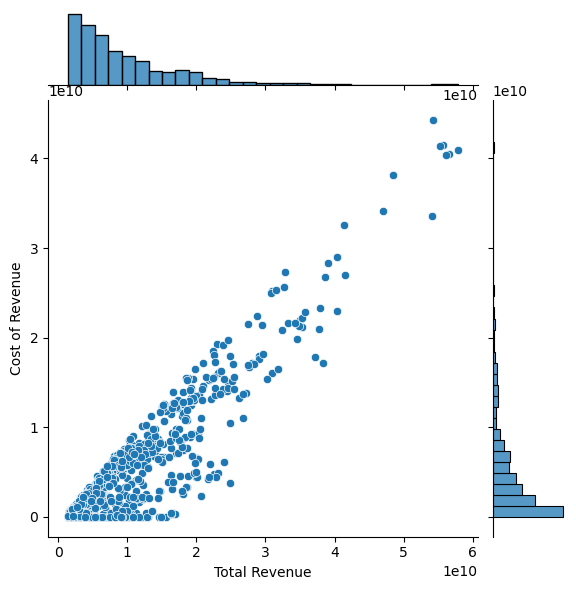

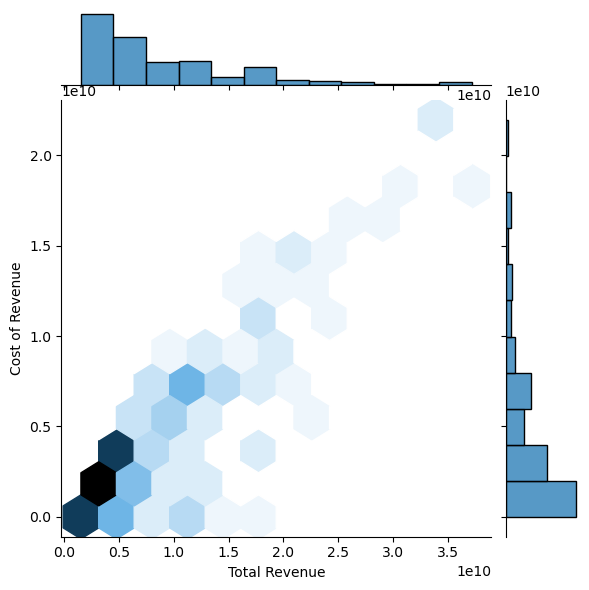

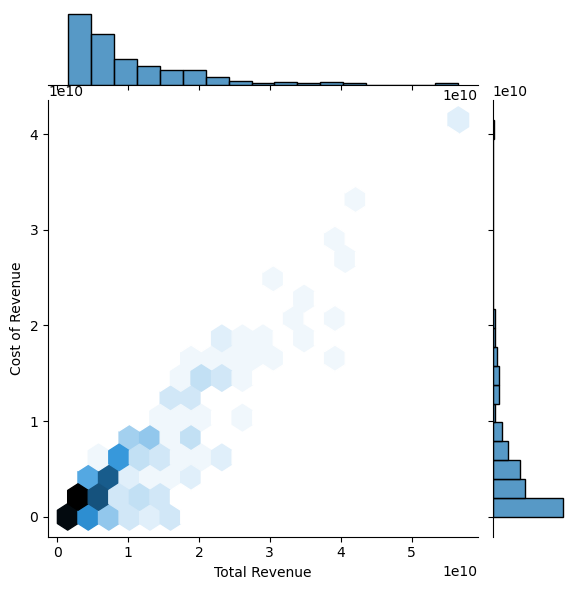

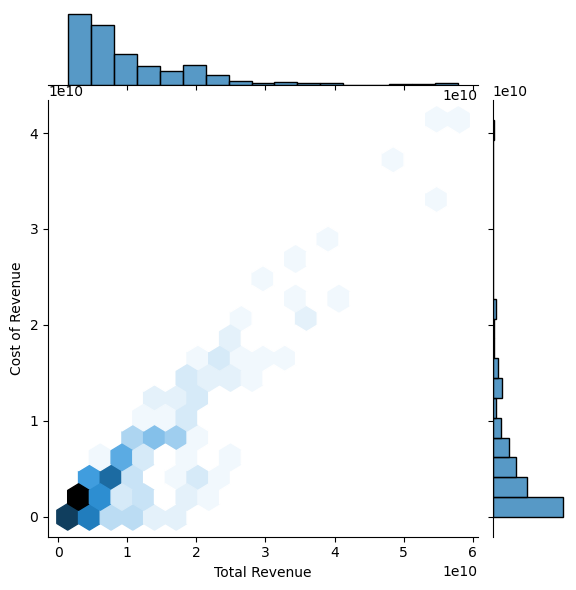

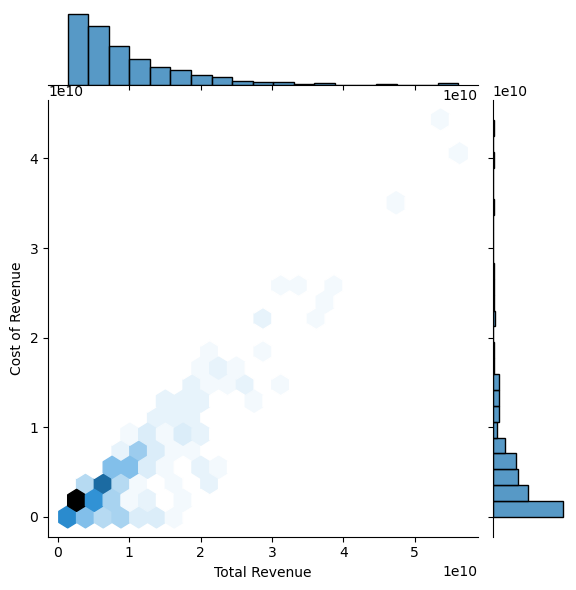

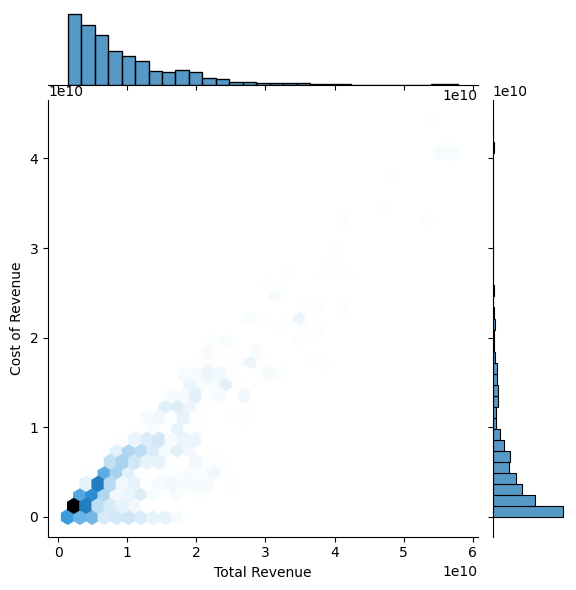

In [4]:
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2012)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2013)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2014)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2015)
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df2)

sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2012,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2013,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2014,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df_2015,kind='hex')
sns.jointplot(x='Total Revenue',y='Cost of Revenue', data=df2,kind='hex')

However, when we plot the heatmap diagram between cost of revenue and the total revenue, we can see the linear tendences for each year separately as well as for general data

We suppose, that there is a linear dependency of more complex structure. That's why we create functions to make the linear regression for the dataframe for the considered values as well as to show its output. The output contains the information about this method applicability as well as the parameters of the linear function. We suppose, that the dependency is in the form of Cost of revenue = const*Total revenue + const2

To see, how this line feets to our data, we make the simple "mypredictionGraph" plotting function

In [5]:
from sklearn.linear_model import LinearRegression

def MyLinearRegression(df):
    x=df[['Total Revenue']] # independent variable
    y=df['Cost of Revenue'] # dependent variable

    x = sm.add_constant(x) # adding a constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary())
    
def MyPredictionGraph(df,coef,const):
    x=df[['Total Revenue']] # independent variable
    y=df['Cost of Revenue'] # dependent variable
    y_pred = coef * x['Total Revenue']+const
    # plotting the data points
    sns.scatterplot(x=x['Total Revenue'], y=y)
    #plotting the line
    sns.lineplot(x=x['Total Revenue'],y=y_pred, color='red')
    #axes
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

In [6]:
MyLinearRegression(df2)
MyLinearRegression(df_2012)
MyLinearRegression(df_2013)
MyLinearRegression(df_2014)
MyLinearRegression(df_2015)

                            OLS Regression Results                            
Dep. Variable:        Cost of Revenue   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     4335.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:01:18   Log-Likelihood:                -19834.
No. Observations:                 858   AIC:                         3.967e+04
Df Residuals:                     856   BIC:                         3.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.445e+09   1.37e+08    -10.572

Total data:

| |  coef  |  std err   |      
|---|---|----
|const    |     -1.445e+09 |  1.37e+08   |
|Total Revenue   |  0.6578    |  0.010     |

For year 2012:

| |  coef  |  std err   |
|---|---|----
|const    |     -6.462e+08 |  2.95e+08 |  
|Total Revenue   |  0.5583    |  0.025   |

For year 2013:

| |  coef  |  std err   |
|---|---|----       
|const    |     -1.434e+09 |  2.57e+08 | 
|Total Revenue   |  0.6570    | 0.018   |

For year 2014:

| |  coef  |  std err   |
|---|---|----       
|const    |     -1.577e+09 |  2.73e+08 |
|Total Revenue   |  0.6688    |  0.019   |

For year 2015:

| |  coef  |  std err   |
|---|---|----       
|const    |     -1.658e+09 |  2.64e+08 |
|Total Revenue   |  0.6864    |  0.020   | 

After passing the linear regression function to the total dataframe as well as to year-by-year ones, we see that 2012 year coeffitients differ a lot, but not another ones. Let's consider the prediction graphs.

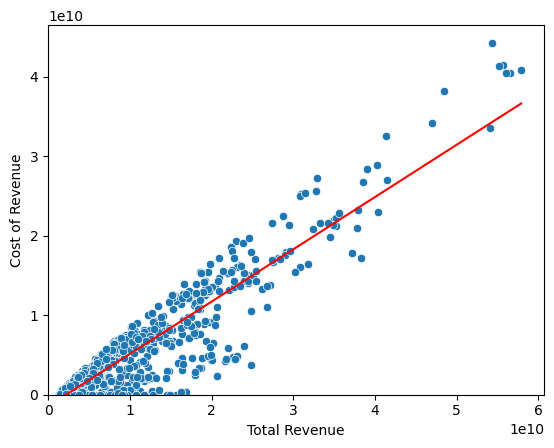

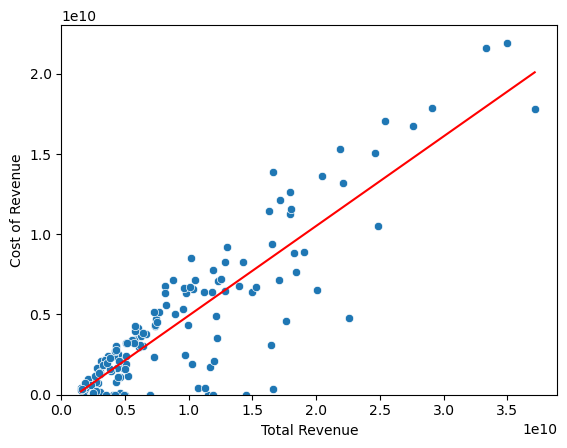

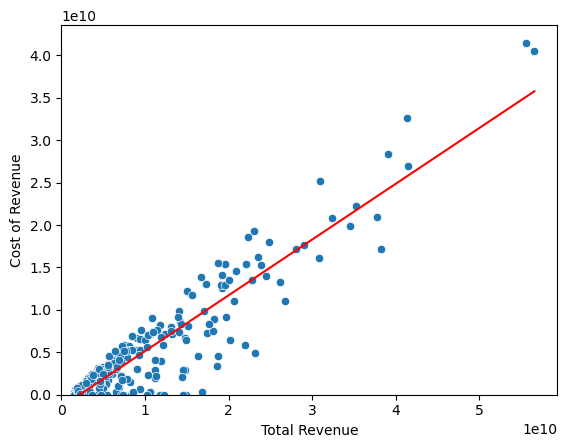

In [7]:
MyPredictionGraph(df2,0.6578,-1.445e+09)
MyPredictionGraph(df_2012,0.5583,-6.462e+08 )
MyPredictionGraph(df_2013,0.6570,-1.434e+09 )

As we can see, the data of the year 2012 is more deviated, than the total one or, for example, the 2013 year one. Let us consider the 2012 year as some kind of outlier and separate the other years to one dataframe.

In [23]:
df3=pd.concat([df_2013, df_2014,df_2015], axis=0)

MyLinearRegression(df3)

                            OLS Regression Results                            
Dep. Variable:        Cost of Revenue   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     3813.
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          4.94e-287
Time:                        12:36:11   Log-Likelihood:                -16404.
No. Observations:                 709   AIC:                         3.281e+04
Df Residuals:                     707   BIC:                         3.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.551e+09   1.53e+08    -10.158

From the obtained data, we can drop the columns of ratio and difference, as we have shown that it is not the case of our dependency. In contrast, we can add the new column with the predicted for the obtained dataset value.

In [24]:
df3 = df3.copy().drop(['Ratio', 'Difference'], axis=1)
df3['Predicted'] =  df3['Total Revenue']*0.6700-1.551e+09

As well, we want to know the mistake in the value of the predicted cost of revenue

In [30]:
df3['DeltaWithPredicted'] =  df3['Cost of Revenue']-df3['Predicted']
print(df3[['Predicted', 'DeltaWithPredicted']].describe())

          Predicted  DeltaWithPredicted
count  7.090000e+02        7.090000e+02
mean   5.482555e+09        2.618501e+04
std    6.285241e+09        2.706564e+09
min   -6.254620e+08       -1.133730e+10
25%    1.176771e+09       -7.853500e+08
50%    3.372665e+09        6.435480e+08
75%    7.881155e+09        1.350532e+09
max    3.724200e+10        9.446370e+09


Even is the differences are big, the values are even bigger. In order to understand, how good is our prediction model, we should deal with the relative difference

In [31]:
df3['RelativeDiff'] =  df3['DeltaWithPredicted']/df3['Cost of Revenue']
print(df3[['RelativeDiff']].describe())

       RelativeDiff
count    709.000000
mean            NaN
std             NaN
min            -inf
25%       -0.247503
50%        0.177927
75%        0.410710
max             inf


he infinity values correspond to the zero costs. Hovever, the interquartile range of the obtained value shows, that our prediction is good enougth. If we will consider more classical relative difference, equal to the absolute value of the previous one, we will obtain the following:

In [32]:
df3['AbsRelativeDiff'] =  abs(df3['RelativeDiff'])
print(df3[['AbsRelativeDiff']].describe())

       AbsRelativeDiff
count       709.000000
mean               inf
std                NaN
min           0.001245
25%           0.196171
50%           0.385347
75%           1.001696
max                inf


In order to show the prediction effectivness at the graphs, we can conside only values that are nou outliers.

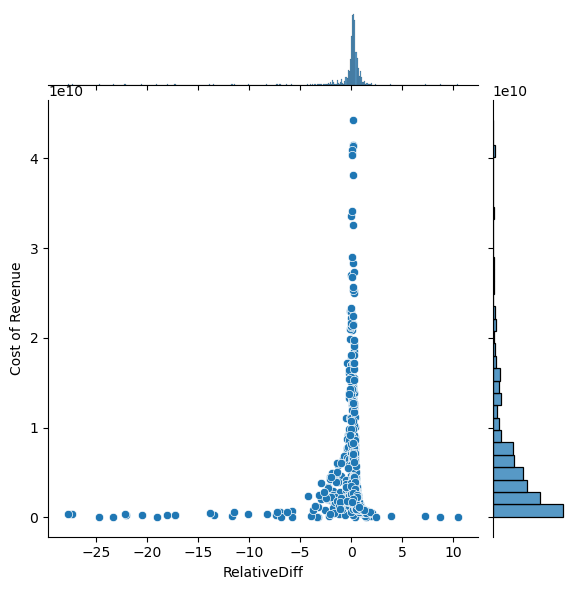

In [33]:
sns.jointplot(x='RelativeDiff',y='Cost of Revenue', data=df3[df3['RelativeDiff'].between(-100, 100)])

Let us consider more closely to the points that have the mistake was less than 100 pourcents of the value

The difference is more than 100 pour cents for 178 values out of 709


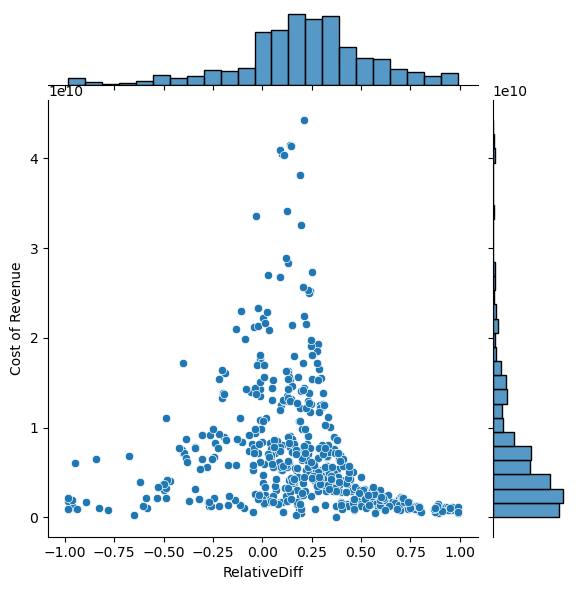

In [36]:
sns.jointplot(x='RelativeDiff',y='Cost of Revenue', data=df3[df3['RelativeDiff'].between(-1, 1)])

print("The difference is more than 100 pour cents for " +str(len(df3)-len(df3[df3['RelativeDiff'].between(-1, 1)]))+" values out of "+ str((len(df3))))

As we can see, the difference is more than 100 pour cents for 178 values out of 709. Thus, knowing the total revenue of the company we can predict the cost of this revenue with the average presicion (+- 100 pourcents) with the probability around 75 pourcents (if we consider that the data is enough in size to be the training one). The prediction graph seems to be more formed in the positive side.

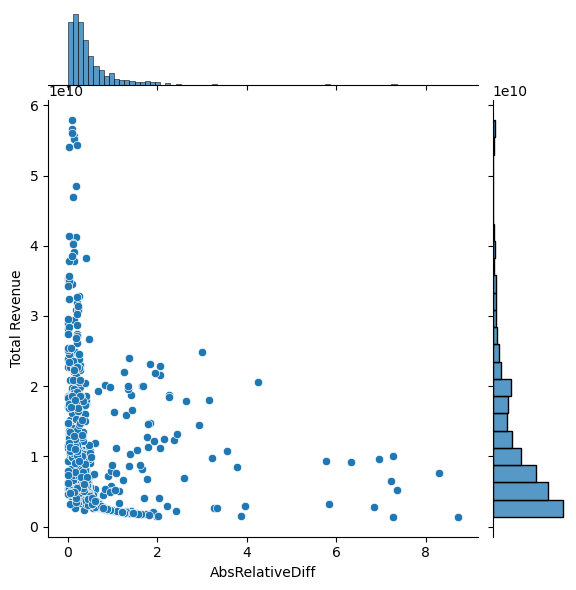

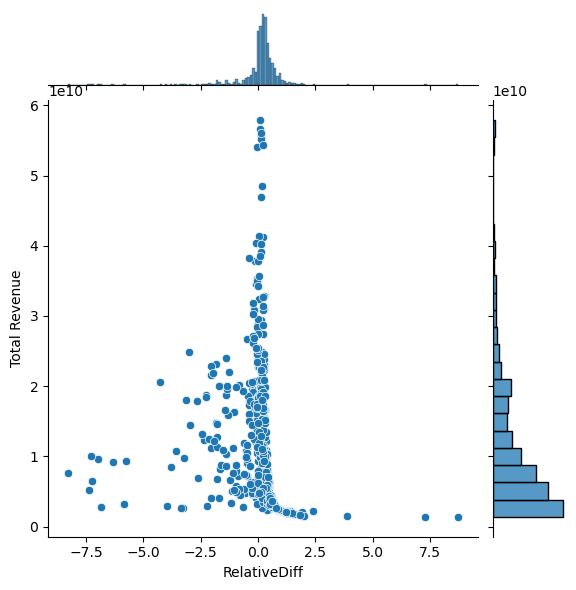

In [39]:
sns.jointplot(x='AbsRelativeDiff',y='Total Revenue', data=df3[df3['AbsRelativeDiff'].between(0, 10)])
sns.jointplot(x='RelativeDiff',y='Total Revenue', data=df3[df3['RelativeDiff'].between(-10, 10)])

The shape of the absolute value of the relative difference clearly shows, that, generally, the more is the total revenue, the less is error. thus, our linear model works well for the big value of income.

The probability of positive mistake and its size are more stable, than the negative ones that look less predictible and to depend on some unstudies in this research study
